This notebook includes the implemention of the baseline model 1.0 on default data (lettuce) and another, bigger data set to evaluate the influence of more data on the baseline model.

1) Baseline Model 1.0 on original_dataset (e.g. Kaggle Lettuce NPK data)
2) Baseline Model 1.0 on data (e.g. maize disease dataset) with increasing number of epochs (10, 20, 50)

In [ ]:
!pip install scikit-learn

In [ ]:
!pip install opencv-python

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.utils import to_categorical
import os
import cv2
from sklearn.model_selection import train_test_split
import tensorflow as tf


In [5]:
# Define the directory path containing the images
data_directory = "/Users/linn/Desktop/original_dataset"
batch_size = 32
image_size = (200,200)
data = tf.keras.utils.image_dataset_from_directory(
    data_directory,
    batch_size=batch_size,
    image_size = image_size,
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset="training")


Found 282 files belonging to 4 classes.
Using 226 files for training.


In [6]:
# Print the class names
class_names = data.class_names
print("Class names:", class_names)


Class names: ['deficiency_nitrogen', 'deficiency_phosphorus', 'deficiency_potassium', 'healthy']


In [7]:
# Convert labels to NumPy arrays
X_train = np.concatenate([x for x, _ in data], axis=0)
y_train = np.concatenate([y for _, y in data], axis=0)


In [8]:
# Convert labels to one-hot encoded format
y_train = to_categorical(y_train, num_classes=4)

In [9]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the baseline model architecture
model = tf.keras.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(4, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 99, 99, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 48, 48, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 23, 23, 128)       0

In [10]:
# Train the model
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
8/8 [==============================] - 4s 392ms/step - loss: 324.2444 - accuracy: 0.2389
Epoch 2/10
8/8 [==============================] - 3s 334ms/step - loss: 5.8121 - accuracy: 0.3451
Epoch 3/10
8/8 [==============================] - 3s 334ms/step - loss: 1.1858 - accuracy: 0.4646
Epoch 4/10
8/8 [==============================] - 3s 333ms/step - loss: 0.8814 - accuracy: 0.6239
Epoch 5/10
8/8 [==============================] - 3s 347ms/step - loss: 0.5937 - accuracy: 0.8053
Epoch 6/10
8/8 [==============================] - 3s 335ms/step - loss: 0.4152 - accuracy: 0.8496
Epoch 7/10
8/8 [==============================] - 3s 336ms/step - loss: 0.2920 - accuracy: 0.8982
Epoch 8/10
8/8 [==============================] - 3s 343ms/step - loss: 0.3488 - accuracy: 0.9336
Epoch 9/10
8/8 [==============================] - 3s 345ms/step - loss: 0.1986 - accuracy: 0.9602
Epoch 10/10
8/8 [==============================] - 3s 347ms/step - loss: 0.1808 - accuracy: 0.9646


In [11]:
val_data = tf.keras.utils.image_dataset_from_directory(
    data_directory,
    batch_size=batch_size,
    image_size=image_size,
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset="validation"
)

Found 282 files belonging to 4 classes.
Using 56 files for validation.


In [12]:
# Convert labels to NumPy arrays
X_val = np.concatenate([x for x, _ in val_data], axis=0)
y_val = np.concatenate([y for _, y in val_data], axis=0)

In [13]:
# Convert labels to one-hot encoded format
y_val = to_categorical(y_val, num_classes=4)

In [14]:
# Evaluate the model on the validation data
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)

2/2 [==============================] - 0s 92ms/step - loss: 3.5216 - accuracy: 0.3393
Validation Loss: 3.521618127822876
Validation Accuracy: 0.3392857015132904


__New Data__

So far the normal baseline model was used. Now the same pipeline will be used for data from another dataset. The new dataset has more images.


In [15]:
# Define the directory path containing the images
data_directory = "/Users/linn/Desktop/data"
batch_size = 32
image_size = (200,200)
data = tf.keras.utils.image_dataset_from_directory(
    data_directory,
    batch_size=batch_size,
    image_size = image_size,
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset="training")


Found 4188 files belonging to 4 classes.
Using 3351 files for training.


In [16]:
# Print the class names
class_names = data.class_names
print("Class names:", class_names)


Class names: ['Blight', 'Common_Rust', 'Gray_Leaf_Spot', 'Healthy']


In [18]:
# Convert labels to NumPy arrays
X_train = np.concatenate([x for x, _ in data], axis=0)
y_train = np.concatenate([y for _, y in data], axis=0)


In [19]:
# Convert labels to one-hot encoded format
y_train = to_categorical(y_train, num_classes=4)

In [22]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the baseline model architecture
model = tf.keras.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(4, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 99, 99, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 48, 48, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 46, 46, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 23, 23, 128)      

In [23]:
# Train the model
history = model.fit(X_train, y_train, epochs=10)

Epoch 1/10
105/105 [==============================] - 44s 411ms/step - loss: 13.0766 - accuracy: 0.2832
Epoch 2/10
105/105 [==============================] - 47s 446ms/step - loss: 1.3377 - accuracy: 0.3447
Epoch 3/10
105/105 [==============================] - 48s 459ms/step - loss: 1.2599 - accuracy: 0.3942
Epoch 4/10
105/105 [==============================] - 49s 469ms/step - loss: 1.1150 - accuracy: 0.4655
Epoch 5/10
105/105 [==============================] - 50s 474ms/step - loss: 0.9994 - accuracy: 0.5112
Epoch 6/10
105/105 [==============================] - 50s 477ms/step - loss: 0.9453 - accuracy: 0.5389
Epoch 7/10
105/105 [==============================] - 52s 491ms/step - loss: 0.9439 - accuracy: 0.5419
Epoch 8/10
105/105 [==============================] - 51s 485ms/step - loss: 0.9085 - accuracy: 0.5673
Epoch 9/10
105/105 [==============================] - 51s 486ms/step - loss: 0.8623 - accuracy: 0.5816
Epoch 10/10
105/105 [==============================] - 51s 489ms/step - 

In [24]:
val_data = tf.keras.utils.image_dataset_from_directory(
    data_directory,
    batch_size=batch_size,
    image_size=image_size,
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset="validation"
)

Found 4188 files belonging to 4 classes.
Using 837 files for validation.


In [25]:
# Convert labels to NumPy arrays
X_val = np.concatenate([x for x, _ in val_data], axis=0)
y_val = np.concatenate([y for _, y in val_data], axis=0)

In [26]:
# Convert labels to one-hot encoded format
y_val = to_categorical(y_val, num_classes=4)

In [27]:
# Evaluate the model on the validation data
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)

27/27 [==============================] - 4s 129ms/step - loss: 3.0234 - accuracy: 0.2605
Validation Loss: 3.023437023162842
Validation Accuracy: 0.260453999042511


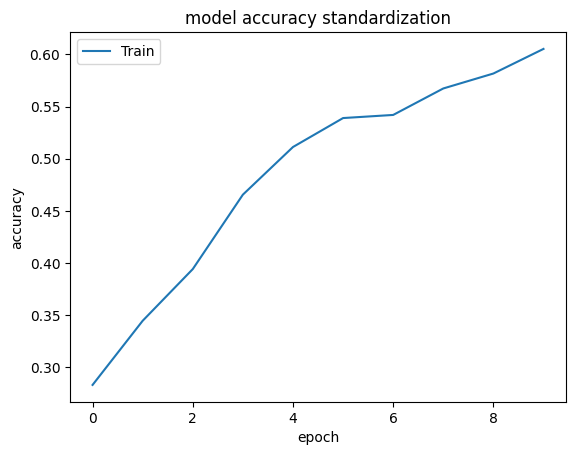

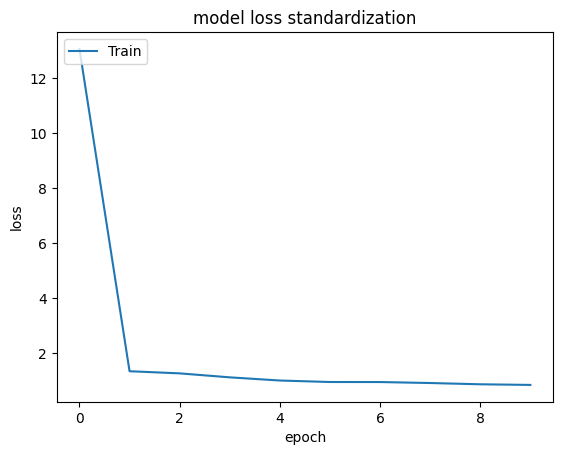

In [29]:
# plotting the loss and accuracy
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['accuracy'])
#plt.plot(history_val[val_accuracy])
plt.title('model accuracy standardization')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
#plt.plot(val_)
plt.title('model loss standardization')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

It seems that the epochs were not enough yet, will try again with more:


In [32]:
# resetting the model

# Define the baseline model architecture
model = tf.keras.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(4, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 99, 99, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 48, 48, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 46, 46, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 23, 23, 128)      

In [33]:
# Train the model
history = model.fit(X_train, y_train, epochs=20)

Epoch 1/20
105/105 [==============================] - 44s 407ms/step - loss: 26.3719 - accuracy: 0.3005
Epoch 2/20
105/105 [==============================] - 47s 443ms/step - loss: 1.3339 - accuracy: 0.3465
Epoch 3/20
105/105 [==============================] - 49s 471ms/step - loss: 1.2495 - accuracy: 0.3945
Epoch 4/20
105/105 [==============================] - 50s 479ms/step - loss: 1.1346 - accuracy: 0.4527
Epoch 5/20
105/105 [==============================] - 51s 484ms/step - loss: 1.0169 - accuracy: 0.5001
Epoch 6/20
105/105 [==============================] - 51s 485ms/step - loss: 0.9645 - accuracy: 0.5246
Epoch 7/20
105/105 [==============================] - 56s 533ms/step - loss: 0.9398 - accuracy: 0.5312
Epoch 8/20
105/105 [==============================] - 55s 520ms/step - loss: 0.9435 - accuracy: 0.5351
Epoch 9/20
105/105 [==============================] - 61s 581ms/step - loss: 0.9593 - accuracy: 0.5386
Epoch 10/20
105/105 [==============================] - 57s 543ms/step - 

In [34]:
val_data = tf.keras.utils.image_dataset_from_directory(
    data_directory,
    batch_size=batch_size,
    image_size=image_size,
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset="validation"
)

Found 4188 files belonging to 4 classes.
Using 837 files for validation.


In [37]:
# Convert labels to NumPy arrays
X_val = np.concatenate([x for x, _ in val_data], axis=0)
y_val = np.concatenate([y for _, y in val_data], axis=0)

In [38]:
# Convert labels to one-hot encoded format
y_val = to_categorical(y_val, num_classes=4)

In [39]:
# Evaluate the model on the validation data
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)

27/27 [==============================] - 3s 121ms/step - loss: 5.3813 - accuracy: 0.3011
Validation Loss: 5.3812713623046875
Validation Accuracy: 0.301075279712677


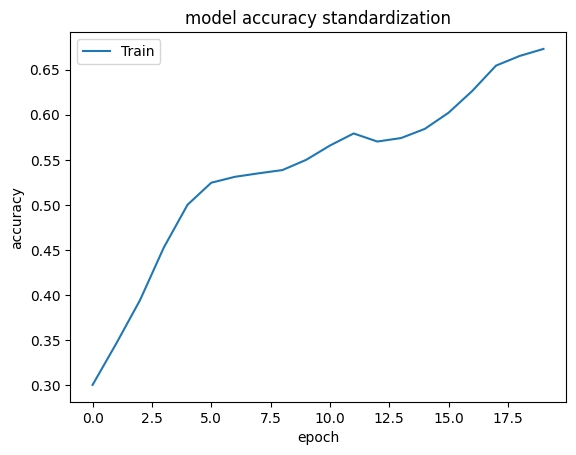

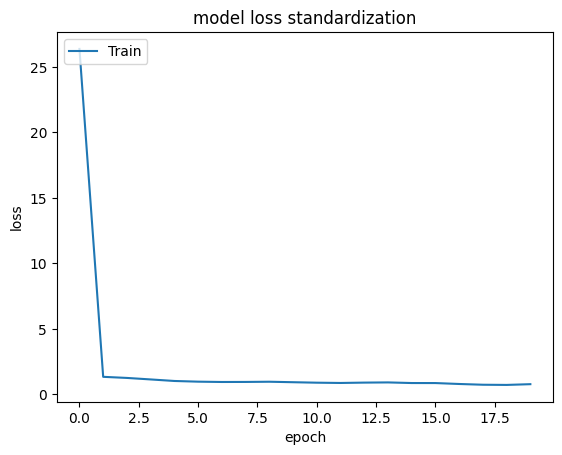

In [40]:
# plotting the loss and accuracy
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['accuracy'])
#plt.plot(history_val[val_accuracy])
plt.title('model accuracy standardization')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
#plt.plot(val_)
plt.title('model loss standardization')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

The model accuracy seems to still be rising at 20 epochs. In the next step the code will run with 50 epochs.

In [41]:
# resetting the model

# Define the baseline model architecture
model = tf.keras.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(4, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 99, 99, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 48, 48, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 46, 46, 128)       73856     
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 23, 23, 128)      

In [42]:
# Train the model
history = model.fit(X_train, y_train, epochs=50)

Epoch 1/50
105/105 [==============================] - 49s 462ms/step - loss: 28.2058 - accuracy: 0.3014
Epoch 2/50
105/105 [==============================] - 63s 597ms/step - loss: 1.3215 - accuracy: 0.3489
Epoch 3/50
105/105 [==============================] - 59s 565ms/step - loss: 1.2369 - accuracy: 0.3963
Epoch 4/50
105/105 [==============================] - 52s 492ms/step - loss: 1.0864 - accuracy: 0.4697
Epoch 5/50
105/105 [==============================] - 53s 503ms/step - loss: 1.0048 - accuracy: 0.5025
Epoch 6/50
105/105 [==============================] - 53s 502ms/step - loss: 0.9678 - accuracy: 0.5225
Epoch 7/50
105/105 [==============================] - 55s 525ms/step - loss: 0.9495 - accuracy: 0.5282
Epoch 8/50
105/105 [==============================] - 60s 572ms/step - loss: 0.9332 - accuracy: 0.5401
Epoch 9/50
105/105 [==============================] - 62s 593ms/step - loss: 0.9093 - accuracy: 0.5506
Epoch 10/50
105/105 [==============================] - 65s 614ms/step - 

In [43]:
val_data = tf.keras.utils.image_dataset_from_directory(
    data_directory,
    batch_size=batch_size,
    image_size=image_size,
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset="validation"
)


Found 4188 files belonging to 4 classes.
Using 837 files for validation.


In [44]:
# Convert labels to NumPy arrays
X_val = np.concatenate([x for x, _ in val_data], axis=0)
y_val = np.concatenate([y for _, y in val_data], axis=0)

In [45]:
# Convert labels to one-hot encoded format
y_val = to_categorical(y_val, num_classes=4)

In [46]:
# Evaluate the model on the validation data
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)

27/27 [==============================] - 3s 112ms/step - loss: 13.2610 - accuracy: 0.2497
Validation Loss: 13.261034965515137
Validation Accuracy: 0.24970132112503052


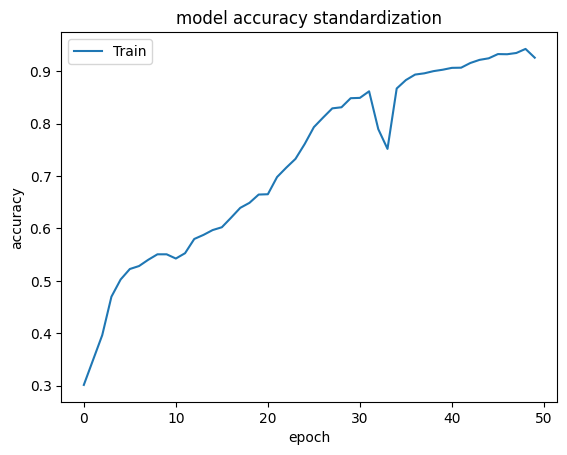

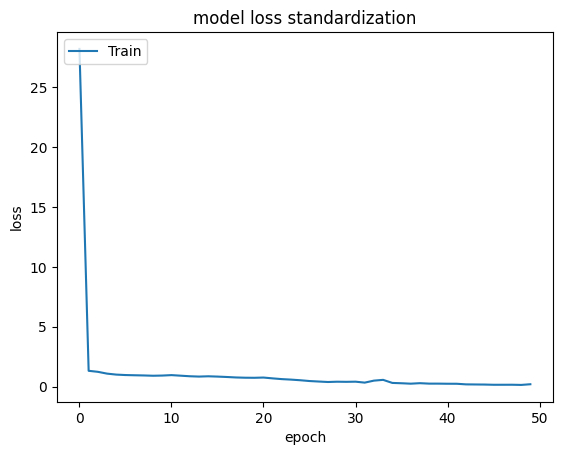

In [47]:
# plotting the loss and accuracy
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['accuracy'])
#plt.plot(history_val[val_accuracy])
plt.title('model accuracy standardization')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
#plt.plot(val_)
plt.title('model loss standardization')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train'], loc='upper left')
plt.show()